In [3]:
%pylab inline 
import os
import cv2
import imutils
from IPython.display import clear_output
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
import matplotlib.path as paths
from PIL import Image, ImageDraw
import copy
from scipy import ndimage
import augmentData
path = '/Users/inchanji/Research/faceData/VAP_RGBD_FaceDataReduced/'

Populating the interactive namespace from numpy and matplotlib


/home/taey22/anaconda3/envs/tf/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
filename = '00001_10'
imgname = 'img_' + filename + '.png'
segname = 'seg_' + filename + '.bmp'

In [14]:
img0 = cv2.imread(path + imgname)[...,::-1]
seg0 = cv2.imread(path + segname)[:,:,0]

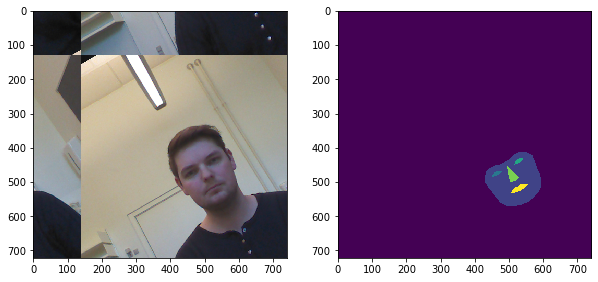

In [15]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(img0)
ax2.imshow(seg0)


In [3]:
tgtname  = '164248'

filename = '003_1'

nrow = 480
ncol = 640


path0    = '/Users/inchanji/Research/faceData/VAP_RGBD_FaceData/' + tgtname + '/'
pathout  = '/Users/inchanji/Research/faceData/VAP_RGBD_FaceDataReduced/' + tgtname + '/'

if not os.path.isdir(pathout):
    os.mkdir(pathout)
    
imgname  = filename + '_c.bmp'
distname = filename + '_d.dat'
distnameBMP = filename + '_d.bmp'

imglist  = list(imutils.paths.list_images(path0))
imgfilename = imglist[0].split(os.sep)[-1].split('_c')[0]
img = cv2.imread(path0 + imgname)[...,::-1]
depth = np.zeros((nrow, ncol))


FileNotFoundError: [Errno 2] No such file or directory: '/Users/inchanji/Research/faceData/VAP_RGBD_FaceDataReduced/164248/'

In [401]:
maxval = 4095
fx = lambda x: maxval if x < 0 else x

with open(path0 + distname, 'r') as f:
    for i, line in enumerate(f):
        for j, d in enumerate(line.split()):
           depth[i,j]  = fx(int(d))


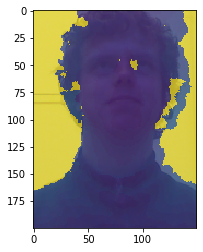

In [404]:
imgresize = cv2.resize(img, (ncol,nrow), interpolation=cv2.INTER_CUBIC)
depthnew  = (np.roll(depth, 20, axis = 1 ) / 4096 * 255).astype('int')
depthnew  = np.roll(depthnew, -10, axis = 0)
plt.imshow(imgresize[150:350,250:400])

plt.imshow(depthnew[150:350,250:400], alpha = 0.7, vmin = 50, vmax = 100)
plt.show()



In [405]:
cv2.imwrite(pathout + imgname, imgresize[:,:,::-1])
cv2.imwrite(pathout + distnameBMP, depthnew)





True

In [10]:
img, seg = augmentData.getModifiedSegmentation(path +'exImg.png', path +'exSegImg.bmp',
                deg = 0, fac = 3, resize = (224, 224), maxshift = 0.3)

TypeError: 'NoneType' object is not subscriptable

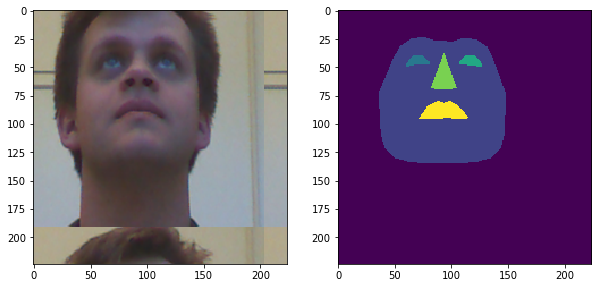

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.imshow(img)


ax2.imshow(seg)

(array([39405.,  9552.,   212.,   179.,   370.,   458.]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <a list of 6 Patch objects>)

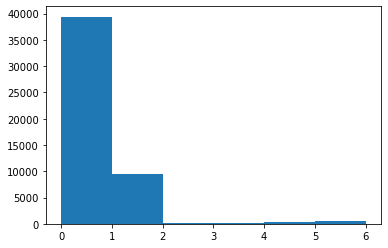

In [30]:
plt.hist(seg.ravel(),bins=6)

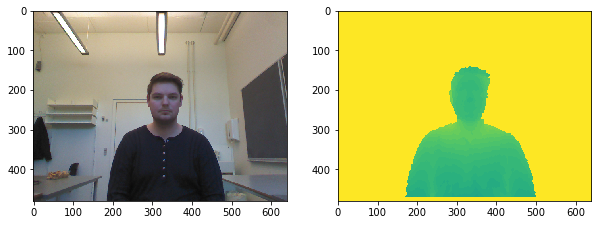

In [417]:
img0path = '/Users/inchanji/Research/faceData/VAP_RGBD_FaceDataReduced/153532/007_1_c.bmp'
dep0path = '/Users/inchanji/Research/faceData/VAP_RGBD_FaceDataReduced/153532/007_1_d.bmp'


img  = cv2.imread(img0path)[...,::-1]
dep = cv2.imread(dep0path)[:,:,0]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(img)
ax2.imshow(dep, vmin = 20, vmax = 80)

In [428]:
dirpath = '/Users/inchanji/Research/faceData/VAP_RGBD_FaceDataReduced/augmented/'
imgfilename = 'img_00001_9.png'
segfilename = 'seg_00001_9.bmp'
depfilename = 'dep_00001_9.bmp'

In [429]:
img0 = cv2.imread(dirpath + imgfilename)[...,::-1]
seg0 = cv2.imread(dirpath + segfilename)[:,:,0]
dep0 = cv2.imread(dirpath + depfilename)[:,:,0]

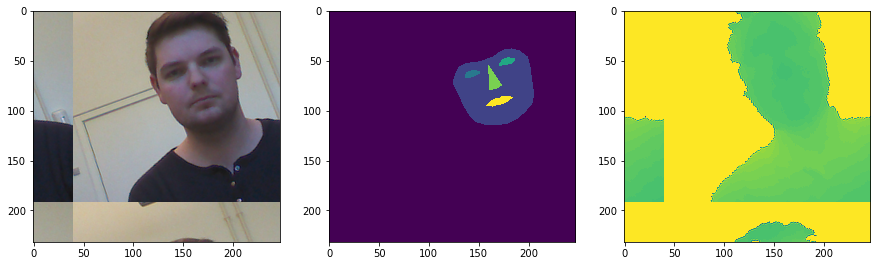

In [430]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.imshow(img0)
ax3.imshow(dep0, vmin = 10, vmax = 80)
ax2.imshow(seg0)


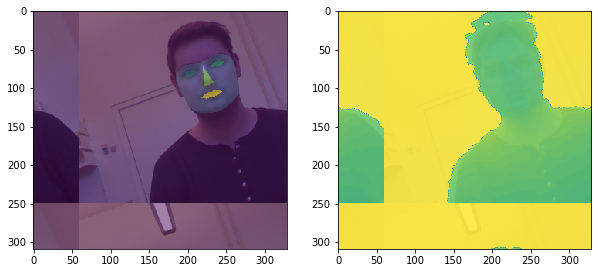

In [409]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(img0)
ax1.imshow(seg0, alpha = 0.5)
ax2.imshow(img0, alpha = 0.5)
ax2.imshow(dep0, alpha = 0.8,  vmin = 10, vmax = 80)